In [ ]:
import tensorflow as tf

In [ ]:
from transformers import BertTokenizer, TFBertForSequenceClassification
import torch

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased')

inputs = tokenizer("Hello, my dog is cute", return_tensors="pt")
labels = torch.tensor([1]).unsqueeze(0)  # Batch size 1
outputs = model(**inputs, labels=labels)
loss = outputs.loss
logits = outputs.logits

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

NameError: name 'BertForSequenceClassification' is not defined

In [ ]:
inputs

In [ ]:
# To train a model on `num_labels` classes, you can pass `num_labels=num_labels` to `.from_pretrained(...)`
num_labels = len(model.config.id2label)
model = TFBertForSequenceClassification.from_pretrained("ydshieh/bert-base-uncased-yelp-polarity", num_labels=num_labels)

labels = tf.constant(1)
loss = model(**inputs, labels=labels).loss
round(float(loss), 2)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import metrics
from joblib import dump

from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm, tree
from sklearn.linear_model import SGDClassifier, LogisticRegression


df1 = pd.read_csv('/content/drive/MyDrive/normie.csv')
df2 = pd.read_csv('/content/drive/MyDrive/dark_patterns.csv')

df1 = df1[pd.notnull(df1["Pattern String"])]
df1 = df1[df1["classification"] == 0]
df1["classification"] = "Not Dark"
df1.drop_duplicates(subset="Pattern String")

df2 = df2[pd.notnull(df2["Pattern String"])]
df2["classification"] = "Dark"
col = ["Pattern String", "classification"]
df2 = df2[col]

df = pd.concat([df1, df2])

X_train, X_test, y_train, y_test = train_test_split(
    df['Pattern String'], df["classification"], random_state=42, test_size=.3)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

# Model creation

classifiers = []
accs = []
cms = []

classifiers.append(BernoulliNB())
classifiers.append(MultinomialNB())
classifiers.append(RandomForestClassifier())
classifiers.append(svm.SVC())
classifiers.append(tree.DecisionTreeClassifier())
classifiers.append(SGDClassifier())
classifiers.append(LogisticRegression())

for clf in classifiers:
    clf.fit(X_train_tfidf, y_train)
    y_pred = clf.predict(count_vect.transform(X_test))
    accs.append(metrics.accuracy_score(y_test, y_pred))
    cms.append(metrics.confusion_matrix(y_test, y_pred))

for i in range(len(classifiers)):
    print(f"{classifiers[i]} accuracy: {accs[i]}")
    print(f"Confusion Matris: {cms[i]}")

BernoulliNB() accuracy: 0.9686888454011742
Confusion Matris: [[410  19]
 [ 13 580]]
MultinomialNB() accuracy: 0.9334637964774951
Confusion Matris: [[419  10]
 [ 58 535]]
RandomForestClassifier() accuracy: 0.9471624266144814
Confusion Matris: [[404  25]
 [ 29 564]]
SVC() accuracy: 0.6956947162426614
Confusion Matris: [[120 309]
 [  2 591]]
DecisionTreeClassifier() accuracy: 0.9178082191780822
Confusion Matris: [[369  60]
 [ 24 569]]
SGDClassifier() accuracy: 0.9452054794520548
Confusion Matris: [[420   9]
 [ 47 546]]
LogisticRegression() accuracy: 0.9452054794520548
Confusion Matris: [[416  13]
 [ 43 550]]


In [ ]:
df

,Pattern String,classification
0,FREE SHIPPING ON ORDERS OVER $100!,Not Dark
1,SOME EXCLUSIONS APPLY - LEARN MORE,Not Dark
2,HAVE A QUESTION? - CONTACT US,Not Dark
3,WELCOME TO 034MOTORSPORT!,Not Dark
4,SHOP AUDISHOP VOLKSWAGENPERFORMANCE SOFTWARE03...,Not Dark
...,...,...
1810,TWO FREE PILLOWS AND 30% OFF WITH PROMO CODE,Dark
1812,Compare at,Dark
1813,$132.90 $99.00,Dark
1814,This offer is only VALID if you add to cart now!,Dark


## FINAL CODE

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense , Input , GlobalMaxPooling1D
from tensorflow.keras.layers import LSTM , GRU , SimpleRNN , Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.losses import BinaryCrossentropy , SparseCategoricalCrossentropy

In [ ]:
df

,Pattern String,classification
0,FREE SHIPPING ON ORDERS OVER $100!,Not Dark
1,SOME EXCLUSIONS APPLY - LEARN MORE,Not Dark
2,HAVE A QUESTION? - CONTACT US,Not Dark
3,WELCOME TO 034MOTORSPORT!,Not Dark
4,SHOP AUDISHOP VOLKSWAGENPERFORMANCE SOFTWARE03...,Not Dark
...,...,...
1810,TWO FREE PILLOWS AND 30% OFF WITH PROMO CODE,Dark
1812,Compare at,Dark
1813,$132.90 $99.00,Dark
1814,This offer is only VALID if you add to cart now!,Dark


In [ ]:
df["classification"] = df["classification"].astype("category").cat.codes

In [ ]:
## number of classes
k = df["classification"].max() + 1
k

2

In [ ]:
df_train , df_test = train_test_split(df , test_size = 0.2)

In [ ]:
## Convert sentences to sequences
MAX_VOCAB_SIZE = 10000
tokenizer = Tokenizer(num_words = MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(df_train["Pattern String"])
sequences_train = tokenizer.texts_to_sequences(df_train["Pattern String"])
sequences_test = tokenizer.texts_to_sequences(df_test["Pattern String"])

In [ ]:
## get word ->integer mapping
word2idx = tokenizer.word_index
V = len(word2idx)
print("Found %s unique tokens." %V)

Found 3566 unique tokens.


In [ ]:
## pad sequences so that we get a N x T matrix
data_train = pad_sequences(sequences_train)
print("Shape of data train tensor :" , data_train.shape)

## get sequence length
T = data_train.shape[1]

Shape of data train tensor : (2724, 147)


In [ ]:
data_test = pad_sequences(sequences_test , maxlen = T)
print("Shape of data tensor: " , data_test.shape)

Shape of data tensor:  (682, 147)


In [ ]:
## Create the model

## We get to choose embedding dimensionality
D = 20

"""
Note : we actually want to the size of the embedding to (V + 1) x D,
because the first index starts from 1 and not 0.
Thus , if the final index of the embedding matrix is V ,
then it actually must have size V + 1.
"""
i = Input(shape = (T , ))
x = Embedding(V + 1 , D)(i)
x = LSTM(32 , return_sequences = True)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(k)(x)

model = Model( i , x)

In [ ]:
## Compile and fit
model.compile(
    loss = SparseCategoricalCrossentropy(from_logits = True) ,
    optimizer = "adam" ,
    metrics = ["accuracy"]
)


print("Training model....")
r = model.fit(data_train ,
              df_train["classification"] ,
              epochs = 55 ,
              validation_data = (data_test , df_test["classification"])
)

Training model....
Epoch 1/55
86/86 [==============================] - 16s 114ms/step - loss: 0.6339 - accuracy: 0.6535 - val_loss: 0.4343 - val_accuracy: 0.9003
Epoch 2/55
86/86 [==============================] - 6s 68ms/step - loss: 0.2600 - accuracy: 0.9244 - val_loss: 0.1514 - val_accuracy: 0.9648
Epoch 3/55
86/86 [==============================] - 5s 58ms/step - loss: 0.1232 - accuracy: 0.9662 - val_loss: 0.1036 - val_accuracy: 0.9765
Epoch 4/55
86/86 [==============================] - 6s 73ms/step - loss: 0.0851 - accuracy: 0.9809 - val_loss: 0.0809 - val_accuracy: 0.9839
Epoch 5/55
86/86 [==============================] - 5s 57ms/step - loss: 0.0568 - accuracy: 0.9883 - val_loss: 0.0821 - val_accuracy: 0.9751
Epoch 6/55
86/86 [==============================] - 5s 64ms/step - loss: 0.0423 - accuracy: 0.9927 - val_loss: 0.0680 - val_accuracy: 0.9795
Epoch 7/55
86/86 [==============================] - 6s 65ms/step - loss: 0.0315 - accuracy: 0.9949 - val_loss: 0.0682 - val_accuracy:

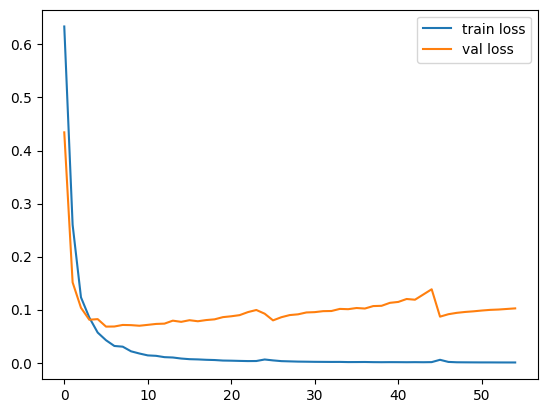

In [ ]:

## plot loss per iteration
plt.plot(r.history["loss"] , label = "train loss")
plt.plot(r.history["val_loss"] , label = "val loss")
plt.legend();

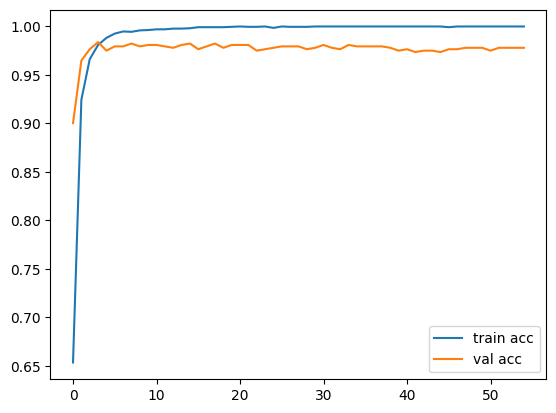

In [ ]:
## plot accuracy per iteration
plt.plot(r.history["accuracy"] , label = "train acc")
plt.plot(r.history["val_accuracy"] , label = "val acc")
plt.legend();

In [ ]:
##
import pickle
saved_model = pickle.dump(model)

TypeError: dump() missing required argument 'file' (pos 2)

In [ ]:
import joblib
joblib.dump(model , "/content/drive/MyDrive/Model")

['/content/drive/MyDrive/Model']